In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# 1. Load Data

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 19) (478,)
Filtered data shape (493, 1080, 19) (493,)
Filtered data shape (856, 1080, 19) (856,)


In [3]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

# 2. Remove cells from edges of FOV

In [4]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)


New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 19) y train: (452,)


In [5]:
indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)


New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 19) y train: (473,)


In [6]:
indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 19) y train: (804,)


# 3. Overimpose images with segmentations to remove background noise

In [7]:
overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)

In [8]:
overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)

In [9]:
overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

# 4. Getting second generation cells from different cell tracks

In [10]:
indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
second_gen_br1 = filtered_track_br1_no_edges[indexes_daughter_br1]
second_gen_br1_images = overimposed_br1[indexes_daughter_br1]
second_gen_br1_y_train = y_train_br1_no_edges[indexes_daughter_br1]

print("Second generation BR1 shape:", second_gen_br1.shape, "Images shape:", second_gen_br1_images.shape, "y train shape:", second_gen_br1_y_train.shape)

Second generation BR1 shape: (57, 1080, 19) Images shape: (57, 1080, 2, 20, 20) y train shape: (57,)


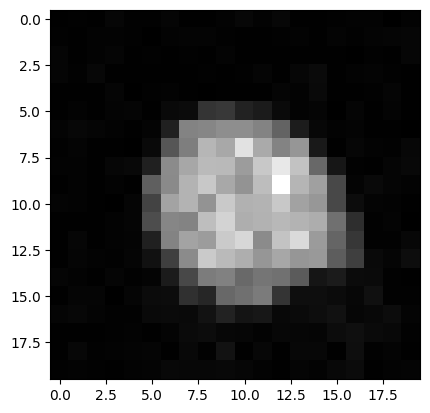

In [11]:
plt.imshow(images_br1_no_edges[10,100,0], cmap='gray')

In [12]:
# remove problematic cells
from ipywidgets import interact, IntSlider

def view_cell_at_time(time_point=0):
    cell_index = 10
    plt.figure(figsize=(6, 6))
    plt.imshow(images_br1_no_edges[cell_index, time_point,0], cmap='gray')
    plt.title(f'Cell {cell_index}, Time Point {time_point}, Fate: {y_train_br1_no_edges[cell_index]}')
    plt.axis('off')
    plt.show()

interact(view_cell_at_time, 
         time_point=IntSlider(min=0, max=1079, step=1, value=0, description='Cell:'))

interactive(children=(IntSlider(value=0, description='Cell:', max=1079), Output()), _dom_classes=('widget-inte…

<function __main__.view_cell_at_time(time_point=0)>

In [13]:
indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
second_gen_br2 = filtered_track_br2_no_edges[indexes_daughter_br2]
second_gen_br2_images = overimposed_br2[indexes_daughter_br2]
second_gen_br2_y_train = y_train_br2_no_edges[indexes_daughter_br2]

print("Second generation BR2 shape:", second_gen_br2.shape, "Images shape:", second_gen_br2_images.shape, "y train shape:", second_gen_br2_y_train.shape)

Second generation BR2 shape: (63, 1080, 19) Images shape: (63, 1080, 2, 20, 20) y train shape: (63,)


In [14]:
indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
second_gen_br3 = filtered_track_br3_no_edges[indexes_daughter_br3]
second_gen_br3_images = overimposed_br3[indexes_daughter_br3]
second_gen_br3_y_train = y_train_br3_no_edges[indexes_daughter_br3]

print("Second generation BR3 shape:", second_gen_br3.shape, "Images shape:", second_gen_br3_images.shape, "y train shape:", second_gen_br3_y_train.shape)

Second generation BR3 shape: (87, 1080, 19) Images shape: (87, 1080, 2, 20, 20) y train shape: (87,)


## 4.1. Removing residual fates 0,1 from the training set

In [15]:
print(np.unique(second_gen_br1_y_train, return_counts=True))
print(np.unique(second_gen_br2_y_train, return_counts=True))
print(np.unique(second_gen_br3_y_train, return_counts=True))

(array([0, 1, 2, 3]), array([ 3,  2, 33, 19]))
(array([0, 1, 2, 3]), array([ 5,  1, 47, 10]))
(array([0, 1, 2, 3]), array([ 2,  2, 61, 22]))


In [16]:
indexes_with_0_y_train_br1 = np.where(second_gen_br1_y_train == 0)[0]
indexes_with_1_y_train_br1 = np.where(second_gen_br1_y_train == 1)[0]

indexes_with_0_y_train_br2 = np.where(second_gen_br2_y_train == 0)[0]
indexes_with_1_y_train_br2 = np.where(second_gen_br2_y_train == 1)[0]

indexes_with_0_y_train_br3 = np.where(second_gen_br3_y_train == 0)[0]
indexes_with_1_y_train_br3 = np.where(second_gen_br3_y_train == 1)[0]

In [17]:
second_gen_br1_images_ = np.delete(second_gen_br1_images, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_y_train_ = np.delete(second_gen_br1_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_tracks = np.delete(second_gen_br1, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)



second_gen_br2_images_ = np.delete(second_gen_br2_images, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_y_train_ = np.delete(second_gen_br2_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_tracks = np.delete(second_gen_br2, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)




second_gen_br3_images_ = np.delete(second_gen_br3_images, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_y_train_ = np.delete(second_gen_br3_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_tracks = np.delete(second_gen_br3, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)


print(second_gen_br1_images_.shape)
print(second_gen_br1_y_train_.shape)
print(second_gen_br2_images_.shape)
print(second_gen_br2_y_train_.shape)
print(second_gen_br3_images_.shape)
print(second_gen_br3_y_train_.shape)

(52, 1080, 2, 20, 20)
(52,)
(57, 1080, 2, 20, 20)
(57,)
(83, 1080, 2, 20, 20)
(83,)


In [18]:
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_images.npy", second_gen_br1_images_)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_y_train.npy", second_gen_br1_y_train_)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_tracks.npy", second_gen_br1_tracks)

np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_images.npy", second_gen_br2_images_)    
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_y_train.npy", second_gen_br2_y_train_)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_tracks.npy", second_gen_br2_tracks)

np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_images.npy", second_gen_br3_images_)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_y_train.npy", second_gen_br3_y_train_)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_tracks.npy", second_gen_br3_tracks)

# 5. Getting second generation cells from same track as mother

In [3]:
second_gen_br1_images_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_images.npy")
second_gen_br1_y_train_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_y_train.npy")
second_gen_br1_tracks = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_tracks.npy")

second_gen_br2_images_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_images.npy")
second_gen_br2_y_train_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_y_train.npy")
second_gen_br2_tracks = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_tracks.npy")

second_gen_br3_images_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_images.npy")
second_gen_br3_y_train_ = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_y_train.npy")
second_gen_br3_tracks = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_tracks.npy")

This should be in the mother tracks!!!

In [4]:
def daughter_trace_keep_only(tabular_data, image_data):
    """
    Keeps only information from daughter cells in both tabular and image data.
    
    - For each cell (row) in tabular_data, it finds the first zero in column 4, **ignoring the first time point**.
    - From the beginning up to (but not including) that time point, it sets all values in that row to zero.
    - Values from that time point onward are kept unchanged.
    - The same index is used to set corresponding images in image_data to zero.

    Args:
        tabular_data (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        image_data (numpy.ndarray): A 5D matrix of shape (cells, time, channels, height, width).

    Returns:
        tuple: Processed (tabular_data, image_data) with zeroed-out values from the beginning up to the determined index.
    """
    processed_tabular = tabular_data.copy()
    processed_images = image_data.copy()
    
    for cell_idx, cell in enumerate(processed_tabular):
        # Ignore the first time point and find the first zero in the 4th column (index 3)
        feature_values = cell[1:, 4]  # Start from the second time point
        first_zero_index = np.argmax(feature_values == 0) + 1 if np.any(feature_values == 0) else None  # Shift by 1
        
        # If a zero is found, zero out both tabular and image data from the beginning up to that time point
        if first_zero_index is not None:
            #print("first_zero_index", first_zero_index, "cell_idx", cell_idx)
            processed_tabular[cell_idx, :first_zero_index, :] = 0
            processed_images[cell_idx, :first_zero_index, :, :, :] = 0  # Zeroing corresponding images
    
    return processed_tabular, processed_images

In [5]:
br1_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br1_mother_images.npy")
br2_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br2_mother_images.npy")
br3_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br3_mother_images.npy")
br1_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br1_mother_tracks.npy")
br2_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br2_mother_tracks.npy")
br3_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br3_mother_tracks.npy")
br1_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br1_y_train.npy")
br2_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br2_y_train.npy")
br3_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br3_y_train.npy")

In [6]:
# Filter BR1 data for cells that split (labels 2 or 3)
br1_split_mask = (br1_y_train == 2) | (br1_y_train == 3)
br1_mother_tracks_split = br1_mother_tracks[br1_split_mask]
br1_mother_images_split = br1_mother_images[br1_split_mask]
br1_y_train_split = br1_y_train[br1_split_mask]

# Filter BR2 data for cells that split (labels 2 or 3)
br2_split_mask = (br2_y_train == 2) | (br2_y_train == 3)
br2_mother_tracks_split = br2_mother_tracks[br2_split_mask]
br2_mother_images_split = br2_mother_images[br2_split_mask]
br2_y_train_split = br2_y_train[br2_split_mask]

# Filter BR3 data for cells that split (labels 2 or 3)
br3_split_mask = (br3_y_train == 2) | (br3_y_train == 3)
br3_mother_tracks_split = br3_mother_tracks[br3_split_mask]
br3_mother_images_split = br3_mother_images[br3_split_mask]
br3_y_train_split = br3_y_train[br3_split_mask]

# Now apply daughter_trace_keep_only to the filtered data
processed_br1_mother_tracks, processed_br1_images = daughter_trace_keep_only(br1_mother_tracks_split, br1_mother_images_split)
processed_br2_mother_tracks, processed_br2_images = daughter_trace_keep_only(br2_mother_tracks_split, br2_mother_images_split)
processed_br3_mother_tracks, processed_br3_images = daughter_trace_keep_only(br3_mother_tracks_split, br3_mother_images_split)

print(f"BR1: {br1_mother_tracks.shape[0]} → {br1_mother_tracks_split.shape[0]} cells after filtering")
print(f"BR2: {br2_mother_tracks.shape[0]} → {br2_mother_tracks_split.shape[0]} cells after filtering") 
print(f"BR3: {br3_mother_tracks.shape[0]} → {br3_mother_tracks_split.shape[0]} cells after filtering")

# processed_br1_mother_tracks, processed_br1_images = daughter_trace_keep_only(br1_mother_tracks, br1_mother_images)
# processed_br2_mother_tracks, processed_br2_images = daughter_trace_keep_only(br2_mother_tracks, br2_mother_images)
# processed_br3_mother_tracks, processed_br3_images = daughter_trace_keep_only(br3_mother_tracks, br3_mother_images)

BR1: 395 → 56 cells after filtering
BR2: 410 → 88 cells after filtering
BR3: 717 → 114 cells after filtering


NOTE: now every cell that came from the mother has first everything as zeros (because it's the mother before it split - so later I need to use the non zero images)

# 6. Concatenate all bioreplicates

In [7]:
images = np.concatenate((second_gen_br1_images_, second_gen_br2_images_, second_gen_br3_images_, processed_br1_images, processed_br2_images, processed_br3_images), axis=0)
tracks = np.concatenate((second_gen_br1_tracks, second_gen_br2_tracks, second_gen_br3_tracks, processed_br1_mother_tracks, processed_br2_mother_tracks, processed_br3_mother_tracks), axis=0)
y_train_final = np.concatenate((second_gen_br1_y_train_, second_gen_br2_y_train_, second_gen_br3_y_train_, br1_y_train_split, br2_y_train_split, br3_y_train_split), axis=0)

print(images.shape)
print(tracks.shape)
print(y_train_final.shape)

(450, 1080, 2, 20, 20)
(450, 1080, 19)
(450,)


In [8]:
len(y_train_final[y_train_final==3])

131

In [9]:
# fate 2 is second generation of cells, that did not die. fate 3 is second generation of cells, that died.
y_train_ = np.where(y_train_final == 2, 0, y_train_final)  # Replace 2 with 0
labels = np.where(y_train_ == 3, 1, y_train_)  # Replace 3 with 1

### Clean images

In [10]:
cleaned_images = clean_all_cells(images)

In [11]:
cleaned_images.shape

(450, 1080, 2, 20, 20)

# Get FRET ratio

In [12]:
fret_images = cleaned_images[:,:,0,:,:] / cleaned_images[:,:,1,:,:] 
fret_images = np.nan_to_num(fret_images, nan=0.0)

/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_65518/1176201609.py:1: RuntimeWarning: invalid value encountered in divide
  fret_images = cleaned_images[:,:,0,:,:] / cleaned_images[:,:,1,:,:]


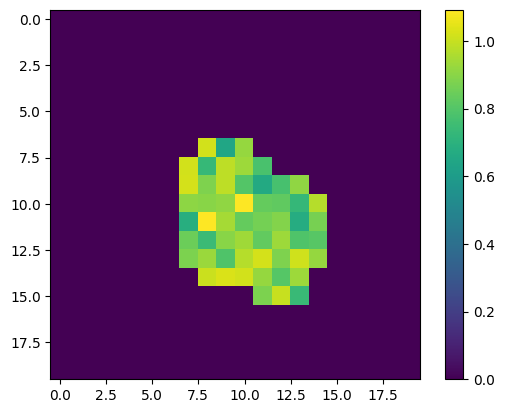

In [13]:
plt.imshow(fret_images[2,10])
plt.colorbar()

In [14]:
problematic_cells = find_problematic_cells_and_times(fret_images)
print("Problematic cells:", problematic_cells)

Problematic cells: [(359, 301)]


In [20]:
# remove problematic cells
from ipywidgets import interact, IntSlider

def view_cell_at_time(time_point=0):
    cell_index = 301
    plt.figure(figsize=(6, 6))
    plt.imshow(fret_images[cell_index, time_point], cmap='gray')
    plt.title(f'Cell {cell_index}, Time Point {time_point}, Fate: {labels[cell_index]}')
    plt.axis('off')
    plt.show()

interact(view_cell_at_time, 
         time_point=IntSlider(min=0, max=1079, step=1, value=0, description='Cell:'))

interactive(children=(IntSlider(value=0, description='Cell:', max=1079), Output()), _dom_classes=('widget-inte…

<function __main__.view_cell_at_time(time_point=0)>

# Removal of "problematic" cells - CHOOSING THE LAST TIME POINT OF DAUGHTER CELLS

In [15]:
fret_images.shape

(450, 1080, 20, 20)

In [21]:
def get_percentage_images(fret_images, percentage):
    """
    Get images at a specific percentage of cell lifetime.
    
    Args:
        fret_images: array of shape (cells, timepoints, height, width)
        percentage: float from 0 to 100 indicating which percentage of lifetime to sample
    
    Returns:
        percentage_images: array of shape (cells, height, width)
        percentage_timepoints: array of timepoint indices for each cell
    """
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100")
    
    num_cells = fret_images.shape[0]
    percentage_images = np.zeros((num_cells, fret_images.shape[2], fret_images.shape[3]))
    percentage_timepoints = np.zeros(num_cells, dtype=int)
    
    for cell_idx in range(num_cells):
        # Check which timepoints have any non-zero values
        has_signal = np.any(fret_images[cell_idx] != 0, axis=(1, 2))
        
        if np.any(has_signal):
            # Find all timepoints with signal
            signal_timepoints = np.where(has_signal)[0]
            total_lifetime = len(signal_timepoints)
            
            # Calculate percentage index (0-based)
            percentage_idx = int((percentage / 100) * total_lifetime)
            # Clamp to valid range
            percentage_idx = max(0, min(percentage_idx, total_lifetime - 1))
            
            percentage_t = signal_timepoints[percentage_idx]
            percentage_images[cell_idx] = fret_images[cell_idx, percentage_t]
            percentage_timepoints[cell_idx] = percentage_t
        else:
            percentage_timepoints[cell_idx] = -1
    
    return percentage_images, percentage_timepoints


# Use the vectorized version
quarter_life_images, quarter_life_timepoints = get_percentage_images(fret_images, 25)

In [23]:
quarter_life_images.shape

(450, 20, 20)

In [ ]:
# remove problematic cells
from ipywidgets import interact, IntSlider

def view_cell_at_time(cell_index=0):
    plt.figure(figsize=(6, 6))
    plt.imshow(quarter_life_images[cell_index], cmap='gray')
    plt.title(f'Cell {cell_index}, Fate: {labels[cell_index]}')
    plt.axis('off')
    plt.show()

interact(view_cell_at_time, 
         cell_index=IntSlider(min=0, max=quarter_life_images.shape[0]-1, step=1, value=0, description='Cell:'))

interactive(children=(IntSlider(value=0, description='Cell:', max=449), Output()), _dom_classes=('widget-inter…

<function __main__.view_cell_at_time(cell_index=0)>

In [28]:
#cell_indexes_to_remove = [19, 33, 48, 91, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136]
#cell_indexes_to_remove = [6, 31, 45, 116, 117, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 136, 205, 214, 218, 239, 242, 245, 260, 290, 301, 319, 346, 347, 348, 350, 351, 355, 356, 357, 358, 359, 363, 364, 365, 366, 367, 368, 369, 373, 416, 431]
cell_indexes_to_remove = [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 135, 136, 242, 245, 301, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 361, 363, 364, 368, 369, 370, 371, 372, 373, 374, 375]
cell_indexes_to_remove = sorted(set(cell_indexes_to_remove))

filtered_images = np.delete(quarter_life_images, cell_indexes_to_remove, axis=0)
filtered_labels = np.delete(labels, cell_indexes_to_remove, axis=0)


In [30]:
filtered_images.shape

(402, 20, 20)

In [ ]:
# remove problematic cells
from ipywidgets import interact, IntSlider

def view_cell_at_time(cell_index=0):
    plt.figure(figsize=(6, 6))
    plt.imshow(filtered_images[cell_index], cmap='gray')
    plt.title(f'Cell {cell_index}, Fate: {labels[cell_index]}')
    plt.axis('off')
    plt.show()

interact(view_cell_at_time, 
         cell_index=IntSlider(min=0, max=filtered_images.shape[0]-1, step=1, value=0, description='Cell:'))

interactive(children=(IntSlider(value=0, description='Cell:', max=401), Output()), _dom_classes=('widget-inter…

<function __main__.view_cell_at_time(cell_index=0)>

In [32]:
filtered_images.shape, filtered_labels.shape

((402, 20, 20), (402,))

### Centering cells

In [33]:
def center_cells_single_frame(images):
    """
    Centers each cell in the middle of a 20x20 field-of-view for single frame data.
    
    Args:
        images: NumPy array of shape (num_cells, 20, 20), where each cell is a binary or intensity image.

    Returns:
        Centered images of the same shape (num_cells, 20, 20).
    """
    num_cells, height, width = images.shape
    centered_images = np.zeros_like(images)

    for i in range(num_cells):
        img = images[i]

        # Find nonzero pixel indices
        y_indices, x_indices = np.where(img > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue  # Skip empty images
        
        # Get bounding box
        y_min, y_max = y_indices.min(), y_indices.max()
        x_min, x_max = x_indices.min(), x_indices.max()
        
        # Extract the cell
        cropped_cell = img[y_min:y_max+1, x_min:x_max+1]

        # Compute new position to center the cropped cell
        new_y_start = (height - cropped_cell.shape[0]) // 2
        new_x_start = (width - cropped_cell.shape[1]) // 2
        
        # Place cropped cell into the new centered array
        centered_images[i, new_y_start:new_y_start+cropped_cell.shape[0], 
                            new_x_start:new_x_start+cropped_cell.shape[1]] = cropped_cell

    return centered_images

In [34]:
centered_images = center_cells_single_frame(filtered_images)

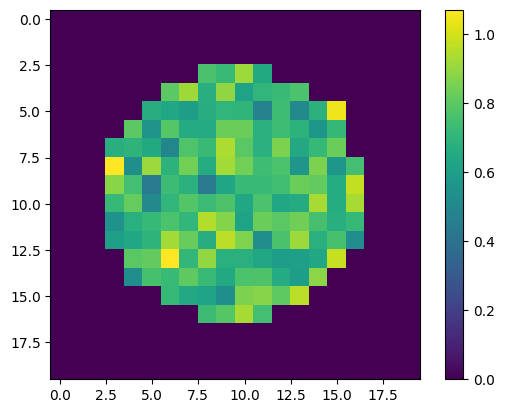

In [35]:
plt.imshow(centered_images[301])
plt.colorbar()

In [ ]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/centered_images_25life.npy", centered_images)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/labels_25life.npy", filtered_labels)

# Normalising cells - Here choose to normalise according to mother cells, or treat daughter cells separately

### Using daughters separately

In [40]:
norm_images = normalize_channels(centered_images)

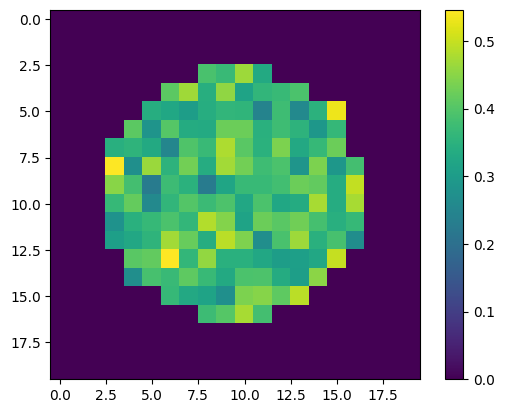

In [45]:
plt.imshow(norm_images[301])
plt.colorbar()

#### Stretching intensities

In [51]:
def stretch_intensities_single_frame(images, epsilon=0.001):
    """
    Stretch the intensities of images globally using the same min and max for a single frame.
    
    Args:
        train_images (ndarray): Training image data [cells, height, width]
        test_images (ndarray): Testing image data [cells, height, width]
        epsilon (float): Value to prevent division by zero

    """
    scaled_images = np.empty(images.shape)

    nonzero_images = images[images > 0]
    global_min = np.min(nonzero_images)
    global_max = np.max(nonzero_images)

    if global_max > global_min:
        # Scale training images
        scaled_images = (images - global_min) / (global_max - global_min)
        scaled_images = scaled_images * (1 - epsilon) + epsilon
        scaled_images[images == 0] = 0  # Preserve zero values (background)
    else:
        # If global_max == global_min, leave unchanged
        scaled_images = images.copy()

    return scaled_images

In [52]:
stretched_images = stretch_intensities_single_frame(norm_images)

### Splitting into train and test set

In [55]:
print(f"Combined dataset shape: {stretched_images.shape}")
print(f"Combined labels shape: {filtered_labels.shape}")
print(f"Label distribution: {np.bincount(filtered_labels)}")

# First split: 60% train, 40% temp (which will be split into 20% val, 20% test)
x_train, x_temp, y_train, y_temp = train_test_split(
    stretched_images, filtered_labels,
    test_size=0.4,  # 40% for temp (val + test)
    random_state=42,
    stratify=filtered_labels  # Keep class balance
)

# Second split: Split the temp 40% into 20% val and 20% test (50/50 split of temp)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,  # 50% of 40% = 20% of total for test, 20% for val
    random_state=42,
    stratify=y_temp  # Keep class balance
)

print(f"Train set: {x_train.shape[0]} samples ({x_train.shape[0]/len(stretched_images)*100:.1f}%)")
print(f"Val set: {x_val.shape[0]} samples ({x_val.shape[0]/len(stretched_images)*100:.1f}%)")
print(f"Test set: {x_test.shape[0]} samples ({x_test.shape[0]/len(stretched_images)*100:.1f}%)")



Combined dataset shape: (402, 20, 20)
Combined labels shape: (402,)
Label distribution: [278 124]
Train set: 241 samples (60.0%)
Val set: 80 samples (19.9%)
Test set: 81 samples (20.1%)


In [ ]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/x_train_second_gen.npy", x_train)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/y_train_second_gen.npy", y_train)

In [56]:
# Augment only the training set
augmented_x_train, augmented_y_train = augment_dataset(x_train, y_train, augmentations)

print(f"Augmented train set: {augmented_x_train.shape[0]} samples")

Balancing Class 0: 1002 → 444 samples (preserving augmentation structure)
✅ Balanced Class 0: 444 samples with equal augmentation representation
Augmented train set: 888 samples


In [ ]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/augmented_x_traintrain_second_gen.npy", augmented_x_train)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/augmented_y_train_second_gen.npy", augmented_y_train)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/x_val_second_gen.npy", x_val)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/y_val_second_gen.npy", y_val)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/x_test_second_gen.npy", x_test)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/y_test_second_gen.npy", y_test)

In [ ]:
import numpy as np
y_pred_discover = np.load("/Users/inescunha/Downloads/test_z_scores_42.npy")
y_test =np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_test.npy")

In [71]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
y_pred_classes = (y_pred_discover>0.5).astype("int32")

In [75]:
y_pred_classes[:,0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

# Combining with mother cells (will delete later)

In [ ]:
#norm_images = normalize_images_per_frame(centered_images)

/Users/inescunha/Documents/GitHub/AI4CellFate/src/preprocessing/preprocessing_functions.py:431: RuntimeWarning: invalid value encountered in divide
  normalized_images[:,j] = cell_images[:,j] / absolute_max


In [51]:
first_gen_images = np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/data/images/centered_images.npy")
first_gen_labels = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy")
first_gen_labels_all = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train_all_fates.npy")

In [52]:
first_gen_labels.shape

(1385,)

In [53]:
# Find indices where labels are 2 or 3
mask = (first_gen_labels_all == 2) | (first_gen_labels_all == 3)

# Filter the images and labels using the mask
first_gen_images_filtered = first_gen_images[mask]
first_gen_labels_filtered = first_gen_labels_all[mask]

print(f"Original shape: {first_gen_images.shape}")
print(f"Filtered shape: {first_gen_images_filtered.shape}")
print(f"Original labels distribution: {np.bincount(first_gen_labels_all)}")
print(f"Filtered labels distribution: {np.bincount(first_gen_labels_filtered)}")
print(f"Filtered labels: {np.unique(first_gen_labels_filtered)}")

Original shape: (1385, 1080, 20, 20)
Filtered shape: (228, 1080, 20, 20)
Original labels distribution: [942 215 152  76]
Filtered labels distribution: [  0   0 152  76]
Filtered labels: [2 3]


## Let's use the first frame of the mother cells only 

In [55]:
first_gen = first_gen_images_filtered[:,0]
second_gen = centered_images

In [56]:
first_gen.shape, second_gen.shape

((228, 20, 20), (402, 20, 20))

In [60]:
# Find the absolute maximum across both matrices
combined_max = max(np.abs(first_gen).max(), np.abs(second_gen).max())

# Normalize both matrices by this combined maximum
first_gen_normalized = first_gen / combined_max
second_gen_normalized = second_gen / combined_max

print(f"Combined absolute maximum: {combined_max}")
print(f"First gen normalized range: [{first_gen_normalized.min():.3f}, {first_gen_normalized.max():.3f}]")
print(f"Second gen normalized range: [{second_gen_normalized.min():.3f}, {second_gen_normalized.max():.3f}]")

Combined absolute maximum: 2.033112582781457
First gen normalized range: [0.000, 1.000]
Second gen normalized range: [0.000, 0.939]


In [61]:
def stretch_intensities_single_frame(train_images, test_images, epsilon=0.001):
    """
    Stretch the intensities of train_images and test_images globally using the same min and max for a single frame.
    
    Args:
        train_images (ndarray): Training image data [cells, height, width]
        test_images (ndarray): Testing image data [cells, height, width]
        epsilon (float): Value to prevent division by zero

    Returns:
        scaled_train_images (ndarray): Scaled training images
        scaled_test_images (ndarray): Scaled testing images
    """
    scaled_train_images = np.empty(train_images.shape)
    scaled_test_images = np.empty(test_images.shape)

    # Combine non-zero values from both datasets to compute global min and max
    combined_images = np.concatenate([train_images[train_images > 0], test_images[test_images > 0]])
    global_min = np.min(combined_images)
    global_max = np.max(combined_images)

    if global_max > global_min:
        # Scale training images
        scaled_train_images = (train_images - global_min) / (global_max - global_min)
        scaled_train_images = scaled_train_images * (1 - epsilon) + epsilon
        scaled_train_images[train_images == 0] = 0  # Preserve zero values (background)

        # Scale test images
        scaled_test_images = (test_images - global_min) / (global_max - global_min)
        scaled_test_images = scaled_test_images * (1 - epsilon) + epsilon
        scaled_test_images[test_images == 0] = 0  # Preserve zero values (background)

    else:
        # If global_max == global_min, leave unchanged
        scaled_train_images = train_images.copy()
        scaled_test_images = test_images.copy()

    return scaled_train_images, scaled_test_images

In [62]:
stretched_first_gen, stretched_second_gen = stretch_intensities_single_frame(first_gen_normalized, second_gen_normalized)

In [63]:
stretched_second_gen.shape

(402, 20, 20)

In [65]:
first_gen_labels_filtered

array([2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2])

In [66]:
# Replace 2 with 0 and 3 with 1
first_gen_labels_filtered = np.where(first_gen_labels_filtered == 2, 0, first_gen_labels_filtered)  # Replace 2 with 0
first_gen_labels_filtered = np.where(first_gen_labels_filtered == 3, 1, first_gen_labels_filtered)  # Replace 3 with 1

print(f"New labels distribution: {np.bincount(first_gen_labels_filtered)}")
print(f"Unique labels: {np.unique(first_gen_labels_filtered)}")

New labels distribution: [152  76]
Unique labels: [0 1]


In [67]:
first_gen_labels_filtered

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0])

In [68]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/stretched_second_gen.npy", stretched_second_gen)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/stretched_first_gen.npy", stretched_first_gen)

# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_labels.npy", first_gen_labels_filtered)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_labels.npy", filtered_labels)

In [72]:
stretched_first_gen.shape, stretched_second_gen.shape

((228, 20, 20), (402, 20, 20))

# Model training

In [73]:
first_gen_images = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/stretched_first_gen.npy')
first_gen_labels = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_labels.npy')

augmented_x_train, augmented_y_train = augment_dataset(first_gen_images, first_gen_labels, augmentations)

second_gen_images = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/stretched_second_gen.npy')
second_gen_labels = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_labels.npy')

x_val, x_test, y_val, y_test = train_test_split(
second_gen_images, second_gen_labels,
test_size=0.5,  # 50% of 40% = 20% of total
random_state=42,
stratify=second_gen_labels  # Keep class balance
)

Balancing Class 0: 912 → 456 samples (preserving augmentation structure)
✅ Balanced Class 0: 456 samples with equal augmentation representation


In [82]:
len(first_gen_labels[first_gen_labels==1])/len(first_gen_labels)

0.3333333333333333

In [78]:
augmented_x_train.max()

0.8785908574816851

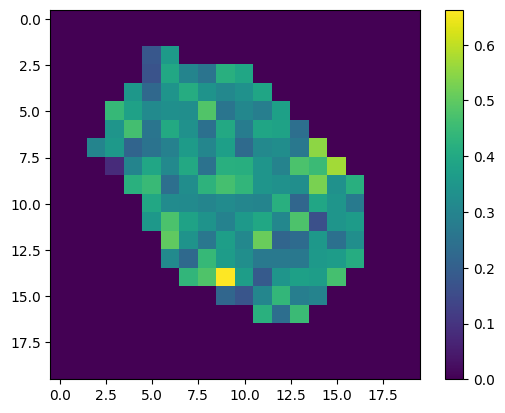

In [75]:
plt.imshow(first_gen_images[100])
plt.colorbar()

# Prepare first gen cells for AAE training

In [150]:
# x_train_first_gen, x_val_first_gen, y_train_first_gen, y_val_first_gen = train_test_split(
#     stretched_first_gen, first_gen_labels_switched, 
#     test_size=0.2,  
#     random_state=42, 
#     stratify=first_gen_labels_switched  # Keep class balance
# )

# first_gen_augmented_images, first_gen_augmented_labels = augment_dataset(x_train_first_gen, y_train_first_gen, augmentations)

#first_gen_augmented_images, first_gen_augmented_labels = augment_dataset(first_gen_normalized, first_gen_labels, augmentations)

Balancing Class 0: 726 → 366 samples (preserving augmentation structure)
✅ Balanced Class 0: 366 samples with equal augmentation representation


In [154]:
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_augmented_images.npy", first_gen_augmented_images)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_augmented_labels.npy", first_gen_augmented_labels)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_val_images.npy", x_val_first_gen)
np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/first_gen_val_labels.npy", y_val_first_gen)

In [88]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_images.npy", stretched_second_gen)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_labels.npy", y_train)